In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("cars.csv")
print(df.head())

   age  gender  miles   debt  income  sales
0   28       0     23      0    4099    620
1   26       0     27      0    2677   1792
2   30       1     58  41576    6215  27754
3   26       1     25  43172    7626  28256
4   20       1     17   6979    8071   4438


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int64
 1   gender  963 non-null    int64
 2   miles   963 non-null    int64
 3   debt    963 non-null    int64
 4   income  963 non-null    int64
 5   sales   963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB
None
              age      gender       miles          debt        income  \
count  963.000000  963.000000  963.000000    963.000000    963.000000   
mean    37.971963    0.512980   27.704050  14109.004154   6176.047767   
std     12.290838    0.500091   13.378181  18273.702481   3260.670142   
min     19.000000    0.000000   10.000000      0.000000      0.000000   
25%     27.000000    0.000000   20.000000   1475.000000   3506.500000   
50%     37.000000    1.000000   25.000000   6236.000000   6360.000000   
75%     49.000000    1.000000   32.000000  16686.000000   864

In [4]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop(columns=['sales'])   # drop target column from features
y = df['sales']                  # target is sales


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nCar Price Prediction Metrics:")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


Car Price Prediction Metrics:
R² Score: 0.8219088838515485
RMSE: 3768.4902077069114
MAE: 2837.2262445565493


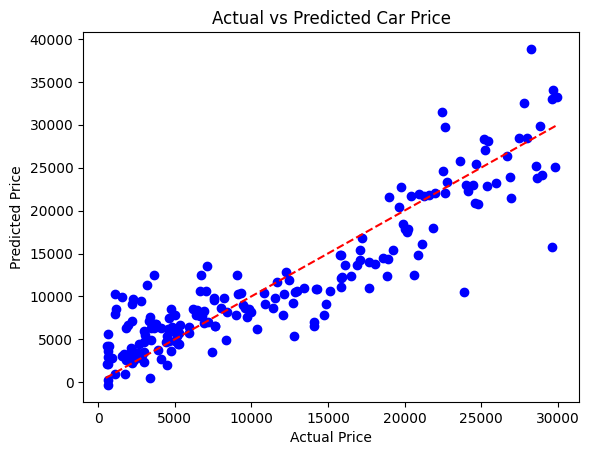

In [12]:
plt.scatter(y_test, y_pred, c='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price")
plt.show()